In [1]:
from sklearn.datasets import load_digits

In [2]:
# 加载数据
digits = load_digits()
data = digits.data

In [3]:
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


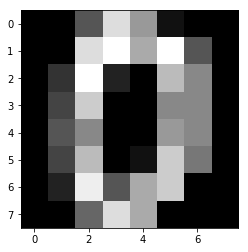

In [19]:
import matplotlib.pyplot as plt

# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

In [6]:
from sklearn import preprocessing

# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

'''
我在train的时候用到了：train_ss_x = ss.fit_transform(train_x)
实际上：fit_transform是fit和transform两个函数都执行一次。所以ss是进行了fit拟合的。
只有在fit拟合之后，才能进行transform在进行test的时候，我们已经在train的时候fit过了，所以直接transform即可。
另外，如果我们没有fit，直接进行transform会报错，因为需要先fit拟合，才可以进行transform。
'''

'\n我在train的时候用到了：train_ss_x = ss.fit_transform(train_x)\n实际上：fit_transform是fit和transform两个函数都执行一次。所以ss是进行了fit拟合的。\n只有在fit拟合之后，才能进行transform在进行test的时候，我们已经在train的时候fit过了，所以直接transform即可。\n另外，如果我们没有fit，直接进行transform会报错，因为需要先fit拟合，才可以进行transform。\n'

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 创建KNN分类器
knn = KNeighborsClassifier()
knn.fit(train_ss_x, train_y) 
predict_y = knn.predict(test_ss_x) 
print("KNN准确率: %.4lf" % accuracy_score(predict_y, test_y))

KNN准确率: 0.9756


In [9]:
from sklearn.svm import SVC

# 创建SVM分类器
svm = SVC()
svm.fit(train_ss_x, train_y)
predict_y=svm.predict(test_ss_x)
print('SVM准确率: %0.4lf' % accuracy_score(predict_y, test_y))

SVM准确率: 0.9867


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [10]:
'''
这里需要注意的是，我们在做多项式朴素贝叶斯分类的时候，传入的数据不能有负数。
因为Z-Score会将数值规范化为一个标准的正态分布，即均值为 0，方差为 1，数值会包含负数。
因此我们需要采用 Min-Max 规范化，将数据规范化到 [0,1] 范围内。
'''

# 采用Min-Max规范化
mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)

In [11]:
from sklearn.naive_bayes import MultinomialNB

# 创建Naive Bayes分类器
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y) 
predict_y = mnb.predict(test_mm_x) 
print("多项式朴素贝叶斯准确率: %.4lf" % accuracy_score(predict_y, test_y))

多项式朴素贝叶斯准确率: 0.8844


In [12]:
from sklearn.tree import DecisionTreeClassifier

# 创建CART决策树分类器
dtc = DecisionTreeClassifier()
dtc.fit(train_mm_x, train_y) 
predict_y = dtc.predict(test_mm_x) 
print("CART决策树准确率: %.4lf" % accuracy_score(predict_y, test_y))

CART决策树准确率: 0.8467
